In [1]:
import os
import GOES as GOES

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import pickle


### Carga Matrices GOES

In [2]:
path_matrices = "E:\\"

with open(path_matrices+'matrices_ACM_Jul_Ago.pkl', 'rb') as file:
    datos_goes = pickle.load(file)

In [3]:
# Imprimos la cantidad de Matrices y su tamaño

dim = datos_goes[list(datos_goes.keys())[0]].shape

print('Total Matrices: ' +str(len(datos_goes)))
print("La dimensión de cada Matriz es: " +str(dim))

Total Matrices: 8928
La dimensión de cada Matriz es: (269, 274)


In [4]:
vector = list(datos_goes.values())[0].flatten()

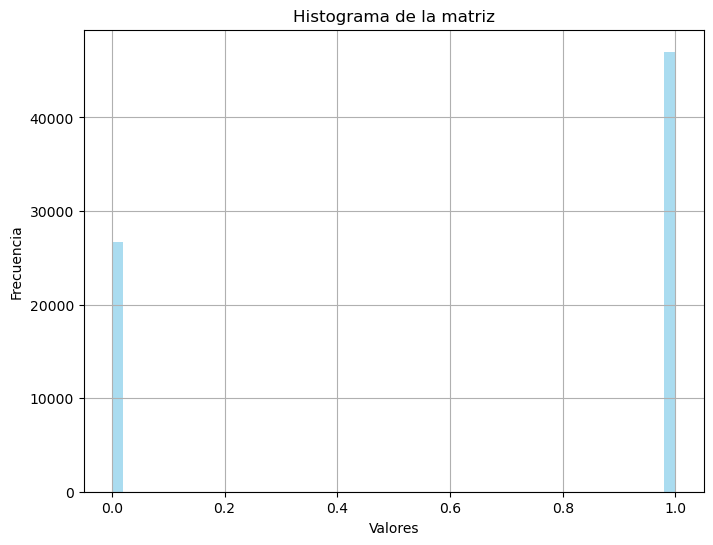

In [5]:
# Generar el histograma del vector
plt.figure(figsize=(8, 6))
plt.hist(vector, bins=50, color='skyblue', alpha=0.7)  # Puedes ajustar el número de bins según sea necesario
plt.title('Histograma de la matriz')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Carga Datos Irradiancia

In [6]:
path_matrices = "E:\\"

with open(path_matrices+'datos_ghi_Jul_Ago.pkl', 'rb') as file:
    irradiancia = pickle.load(file)

In [7]:
irradiancia

{'2023-07-01 00:00': 0.0,
 '2023-07-01 00:10': 0.0,
 '2023-07-01 00:20': 0.0,
 '2023-07-01 00:30': 0.0,
 '2023-07-01 00:40': 0.0,
 '2023-07-01 00:50': 0.0,
 '2023-07-01 01:00': 0.0,
 '2023-07-01 01:10': 0.0,
 '2023-07-01 01:20': 0.0,
 '2023-07-01 01:30': 0.0,
 '2023-07-01 01:40': 0.0,
 '2023-07-01 01:50': 0.0,
 '2023-07-01 02:00': 0.0,
 '2023-07-01 02:10': 0.0,
 '2023-07-01 02:20': 0.0,
 '2023-07-01 02:30': 0.0,
 '2023-07-01 02:40': 0.0,
 '2023-07-01 02:50': 0.0,
 '2023-07-01 03:00': 0.0,
 '2023-07-01 03:10': 0.0,
 '2023-07-01 03:20': 0.0,
 '2023-07-01 03:30': 0.0,
 '2023-07-01 03:40': 0.0,
 '2023-07-01 03:50': 0.0,
 '2023-07-01 04:00': 0.0,
 '2023-07-01 04:10': 0.0,
 '2023-07-01 04:20': 0.0,
 '2023-07-01 04:30': 0.0,
 '2023-07-01 04:40': 0.0,
 '2023-07-01 04:50': 0.0,
 '2023-07-01 05:00': 0.0,
 '2023-07-01 05:10': 0.01,
 '2023-07-01 05:20': 0.09,
 '2023-07-01 05:30': 0.66,
 '2023-07-01 05:40': 4.87,
 '2023-07-01 05:50': 12.3,
 '2023-07-01 06:00': 21.61,
 '2023-07-01 06:10': 28.85,
 '2

## Validación de Datos y Transformación para Modelo

In [8]:
# Se validan las fechas del diccionario de irradiancia
print("Fecha Inicio Irradiancia: " + str(list(irradiancia.keys())[0]))
print("Fecha Fin Irradiancia: " + str(list(irradiancia.keys())[-1]))
print("Total Datos Irradiancia: " + str(len(list(irradiancia.keys()))))

print()

# Se validan las fechas del diccionario de matrices
print("Fecha Inicio Matrices: " + str(list(datos_goes.keys())[0]))
print("Fecha Fin Matrices: " + str(list(datos_goes.keys())[-1]))
print("Total Matrices: " + str(len(list(datos_goes.keys()))))

Fecha Inicio Irradiancia: 2023-07-01 00:00
Fecha Fin Irradiancia: 2023-08-31 23:50
Total Datos Irradiancia: 8928

Fecha Inicio Matrices: 2023-07-01 00:00
Fecha Fin Matrices: 2023-08-31 23:50
Total Matrices: 8928


In [9]:
# Ya evidenciada que los diccionarios tienen las mismas llaves, se crean listas para almacenar los valores de interes
matriz_3d = list(datos_goes.values())
vector_irradiancia = list(irradiancia.values())
llave_fecha = list(irradiancia.keys())

### Cambiar el tipo de datos en la Matriz para optimizar almacenamiento y procesamiento

In [10]:
matriz_3d[0]

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [11]:
matriz_3d_min = []
for matriz in matriz_3d:
    matriz_uint8 = matriz.astype(np.uint8)
    matriz_3d_min.append(matriz_uint8)

In [12]:
matriz_3d_min[0]

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

### VENTANA TEMPORAL

In [13]:
# Convertir las listas en arreglos numpy
matrices = np.array(matriz_3d_min) 
valores_irradiancia = vector_irradiancia 

In [14]:
print('matrices: ' +str(matrices.shape))
print('valores_irradiancia: ' +str(len(valores_irradiancia)))

matrices: (8928, 269, 274)
valores_irradiancia: 8928


In [15]:
# Definir el tamaño de la ventana temporal
window_size = 18 # Son los datos que quiero tomar para predecir mi valor/es futuros
prediccion = 36 # Son los valores que voy a predecir

# Listas para almacenar las ventanas de datos
ventanas_irradiancia = []
ventanas_imagenes = []
valores_objetivo = []
fechas_objetivo = []


# Crear ventanas temporales
for i in range(len(valores_irradiancia) - window_size - prediccion + 1):
    ventana_irradiancia = valores_irradiancia[i:i+window_size]
    ventana_imagenes = matrices[i:i+window_size]
    
    ventanas_irradiancia.append(ventana_irradiancia)
    ventanas_imagenes.append(ventana_imagenes)
    
    # Crear el valor objetivo que corresponde a la ventana actual
    valor_objetivo = valores_irradiancia[i+window_size:i+window_size+prediccion]
    valores_objetivo.append(valor_objetivo)
    
    # Almacena las fechas objetivo
    fecha_objetivo = llave_fecha[i+window_size:i+window_size+prediccion]
    fechas_objetivo.append(fecha_objetivo)

# Convertir las listas en matrices numpy para su posterior procesamiento
ventanas_irradiancia = np.array(ventanas_irradiancia)
ventanas_imagenes = np.array(ventanas_imagenes)
valores_objetivo = np.array(valores_objetivo)

In [16]:
# Imprimimos el tamaño de cada una de las secuencias
print('ventanas_irradiancia: ' +str(ventanas_irradiancia.shape))
print('ventanas_imagenes: ' +str(ventanas_imagenes.shape))
print('valores_objetivo: ' +str(valores_objetivo.shape))

ventanas_irradiancia: (8875, 18)
ventanas_imagenes: (8875, 18, 269, 274)
valores_objetivo: (8875, 36)


### DIVISIÓN DATOS ENTRENAMIENTO VALIDACION Y TEST

In [17]:
n_total = len(ventanas_irradiancia)
n_entrenamiento = int(n_total * 0.7)  # 70% para entrenamiento
n_validacion = int(n_total * 0.20)  # 20% para validación
n_test = n_total - n_entrenamiento - n_validacion  # Restante para prueba

print("Datos para Entrenamiento: " + str(n_entrenamiento))
print("Datos para Validación: " + str(n_validacion))
print("Datos para Prueba: " + str(n_test))

x_train_ima = ventanas_imagenes[:n_entrenamiento]
x_train_irr = ventanas_irradiancia[:n_entrenamiento]
y_train = valores_objetivo[:n_entrenamiento]
fechas_train = fechas_objetivo[:n_entrenamiento]

x_val_ima = ventanas_imagenes[n_entrenamiento:n_entrenamiento + n_validacion]
x_val_irr = ventanas_irradiancia[n_entrenamiento:n_entrenamiento + n_validacion]
y_val = valores_objetivo[n_entrenamiento:n_entrenamiento + n_validacion]
fechas_val = fechas_objetivo[n_entrenamiento:n_entrenamiento + n_validacion]

x_test_ima = ventanas_imagenes[-n_test:]
x_test_irr = ventanas_irradiancia[-n_test:]
y_test = valores_objetivo[-n_test:]
fechas_test = fechas_objetivo[-n_test:]


Datos para Entrenamiento: 6212
Datos para Validación: 1775
Datos para Prueba: 888


In [18]:
print('x_train_imagenes: ' +str(x_train_ima.shape))
print('x_train_irradiancia: ' +str(x_train_irr.shape))
print('y_train: ' +str(y_train.shape))

print('x_val_imagenes: ' +str(x_val_ima.shape))
print('x_val_irradiancia: ' +str(x_val_irr.shape))
print('y_val: ' +str(y_val.shape))

print('x_test_imagenes: ' +str(x_test_ima.shape))
print('x_test_irradiancia: ' +str(x_test_irr.shape))
print('y_test: ' +str(y_test.shape))


x_train_imagenes: (6212, 18, 269, 274)
x_train_irradiancia: (6212, 18)
y_train: (6212, 36)
x_val_imagenes: (1775, 18, 269, 274)
x_val_irradiancia: (1775, 18)
y_val: (1775, 36)
x_test_imagenes: (888, 18, 269, 274)
x_test_irradiancia: (888, 18)
y_test: (888, 36)


### NORMALIZACIÓN DE LOS DATOS

#### Data Entrenamiento

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Escalado de las imagenes
# image_scaler = MinMaxScaler(feature_range=(0, 1))
# x_train_ima_norm = []

# for ventana in x_train_ima:
#     normalized_images = [image_scaler.fit_transform(image) for image in ventana]
#     x_train_ima_norm.append(normalized_images)

# x_train_ima_norm = np.array(x_train_ima_norm)

In [20]:
# Escalado de las ventanas de Irradiancia
# irradiancia_scaler = MinMaxScaler()
# x_train_irr_norm = irradiancia_scaler.fit_transform(x_train_irr)


In [21]:
objetivo_scaler = MinMaxScaler()
y_train_norm = objetivo_scaler.fit_transform(y_train)

#### Normalizamos Datos de Validación y Test con los ajustes de Train



In [22]:
# Normalizamos las Imagenes usando eltransformer dado por Train
# x_val_ima_norm = []

# for ventana in x_val_ima:
#     normalized_images = [image_scaler.transform(image) for image in ventana]
#     x_val_ima_norm.append(normalized_images)

# x_val_ima_norm = np.array(x_val_ima_norm)


# # Normalizamos la Irradiancia usando eltransformer dado por Train
# x_val_irr_norm = irradiancia_scaler.transform(x_val_irr)


# Normalizamos la Irradiancia usando eltransformer dado por Train
y_val_norm = objetivo_scaler.transform(y_val)

In [23]:
# Normalizamos las Imagenes usando eltransformer dado por Train
# x_test_ima_norm = []

# for ventana in x_test_ima:
#     normalized_images = [image_scaler.transform(image) for image in ventana]
#     x_test_ima_norm.append(normalized_images)

# x_test_ima_norm = np.array(x_test_ima_norm)


# # Normalizamos la Irradiancia usando eltransformer dado por Train
# x_test_irr_norm = irradiancia_scaler.transform(x_test_irr)


# Normalizamos la Irradiancia usando eltransformer dado por Train
y_test_norm = objetivo_scaler.transform(y_test)

In [24]:
# Imprimimos el tamaño de cada una de las secuencias de Train
# print('x_train_imagenes_norm: ' +str(x_train_ima_norm.shape))
# print('x_train_irradiancia_norm: ' +str(x_train_irr_norm.shape))
print('y_train_norm: ' +str(y_train_norm.shape))
print()

# Imprimimos el tamaño de cada una de las secuencias de Validation
# print('x_val_imagenes_norm: ' +str(x_val_ima_norm.shape))
# print('x_val_irradiancia_norm: ' +str(x_val_irr_norm.shape))
print('y_val_norm: ' +str(y_val_norm.shape))
print()

# Imprimimos el tamaño de cada una de las secuencias de Test
# print('x_test_imagenes_norm: ' +str(x_test_ima_norm.shape))
# print('x_test_irradiancia_norm: ' +str(x_test_irr_norm.shape))
print('y_test_norm: ' +str(y_test_norm.shape))
print()

y_train_norm: (6212, 36)

y_val_norm: (1775, 36)

y_test_norm: (888, 36)



### Creación Datos Hora Minutos Para Modelo

Los valores de la matriz estan almacenados como float32. Este producto solo tiene valores de 0 y 1 para cada pixel, por lo que por optimización se cambia el tipo de dato a unit8

### CREACIÓN MODELO

In [25]:
import tensorflow.keras as keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras.layers import Input, LSTM, Flatten, Dense, Concatenate
from keras.metrics import MeanAbsoluteError, MeanAbsolutePercentageError, RootMeanSquaredError
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Reiniciar Keras
keras.backend.clear_session()

In [26]:
# Definimos los tamaños con los que va a trabajar la red, de acuerdo a la ventana seleccionada y el tamaño de la imagen
shape_imagen = (18,269,274,1)
shape_irradiancia = (18,1)
shape_prediccion = 36


input_images = Input(shape=shape_imagen)  

# Capa ConvLSTM2D para procesar las imágenes secuenciales
convlstm_output = ConvLSTM2D(32, (3, 3))(input_images)

# Capa Flatten para aplanar la salida de ConvLSTM
flat_output = Flatten()(convlstm_output)

# Entrada para la secuencia temporal de irradiancia
input_irradiancia = Input(shape=shape_irradiancia)

# Capa LSTM para procesar la secuencia temporal de irradiancia
lstm_output = LSTM(64)(input_irradiancia)

# Concatenación de las salidas de ConvLSTM2D y LSTM
concatenated = Concatenate()([flat_output, lstm_output])

# Capa de salida
output = Dense(shape_prediccion)(concatenated)
# output = Dense(shape_prediccion, activation=lambda x: keras.activations.relu(x, threshold=0.0))(concatenated)

# Modelo final
model = Model(inputs=[input_images, input_irradiancia], outputs=output)

# Definir métricas adicionales
mae_metric = MeanAbsoluteError()
mape_metric = MeanAbsolutePercentageError()
rmse_metric = RootMeanSquaredError()

# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error',metrics=[mae_metric, mape_metric, rmse_metric])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 18, 269, 274, 1)]    0         []                            
                                                                                                  
 conv_lstm2d (ConvLSTM2D)    (None, 267, 272, 32)         38144     ['input_1[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, 18, 1)]              0         []                            
                                                                                                  
 flatten (Flatten)           (None, 2323968)              0         ['conv_lstm2d[0][0]']         
                                                                                             

### Entrenamiento del Modelo

In [27]:
# Limitamos los datos de entrenamiento y Validación, dado los tamaños de las entradas

x_train_ima_red = x_train_ima[:4000]
x_train_irr_red = x_train_irr[:4000]
y_train_norm_red = y_train_norm[:4000]
x_val_ima_red = x_val_ima[:4000]
x_val_irr_red = x_val_irr[:4000]
y_val_norm_red = y_val_norm[:4000]

In [28]:
%%time
model.fit([x_train_ima, x_train_irr], y_train_norm, epochs=10, batch_size=16, 
          validation_data=([x_val_ima, x_val_irr], y_val_norm) )

# model.fit([x_train_ima_red, x_train_irr_red], y_train_norm_red, epochs=10, batch_size=16, 
#           validation_data=([x_val_ima_red, x_val_irr_red], y_val_norm_red) )

Epoch 1/10

389/389 [==============================] - 3214s 8s/step - loss: 58.1931 - mean_absolute_error: 1.9367 - mean_absolute_percentage_error: 571387328.0000 - root_mean_squared_error: 7.6284 - val_loss: 0.1201 - val_mean_absolute_error: 0.2634 - val_mean_absolute_percentage_error: 57561812.0000 - val_root_mean_squared_error: 0.3466
Epoch 2/10
389/389 [==============================] - 3207s 8s/step - loss: 0.1235 - mean_absolute_error: 0.2574 - mean_absolute_percentage_error: 73313944.0000 - root_mean_squared_error: 0.3514 - val_loss: 0.0996 - val_mean_absolute_error: 0.2343 - val_mean_absolute_percentage_error: 42007168.0000 - val_root_mean_squared_error: 0.3156
Epoch 3/10
389/389 [==============================] - 3193s 8s/step - loss: 0.1118 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 73315176.0000 - root_mean_squared_error: 0.3344 - val_loss: 0.0999 - val_mean_absolute_error: 0.2472 - val_mean_absolute_percentage_error: 62127768.0000 - val_root_mean_squar

### Evaluación del modelo

In [30]:
evaluation_result = model.evaluate([x_test_ima, x_test_irr], y_test_norm)
print("MSE - MAE - MAPE - RMSE:", (evaluation_result))

28/28 [==============================] - 127s 5s/step - loss: 0.0765 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 68072288.0000 - root_mean_squared_error: 0.2765
MSE - MAE - MAPE - RMSE: [0.07646091282367706, 0.21567313373088837, 68072288.0, 0.2765156626701355]


### Predicciones Runiwat

Vamos a Comparar dos rangos de predicciones distintos, entre la data dada por Runiwat y el modelo generado

In [31]:
# Descargamos uno de los archivos que contiene las prediccinoes de 6 horas adelante hechas por Runiwatt - para compración contra el modelo

df_rw_1 = pd.read_csv('E:\data_irradiancia/hourcast_elpaso_20230829T0950.csv')
df_rw_1['date'] = df_rw_1['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S%z") - timedelta(hours=5))
df_rw_1.head(10)

,date,ghi
0,2023-08-29 05:00:00+00:00,0.000000
1,2023-08-29 05:10:00+00:00,0.000000
2,2023-08-29 05:20:00+00:00,0.000000
3,2023-08-29 05:30:00+00:00,0.000000
4,2023-08-29 05:40:00+00:00,0.000000
5,2023-08-29 05:50:00+00:00,0.862843
6,2023-08-29 06:00:00+00:00,7.019470
7,2023-08-29 06:10:00+00:00,18.230200
8,2023-08-29 06:20:00+00:00,34.957100
9,2023-08-29 06:30:00+00:00,58.625100


In [32]:
# Descargamos uno de los archivos que contiene las prediccinoes de 6 horas adelante hechas por Runiwatt - para compración contra el modelo

df_rw_2 = pd.read_csv('E:\data_irradiancia/hourcast_elpaso_20230830T1410.csv')
df_rw_2['date'] = df_rw_2['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S%z") - timedelta(hours=5))
df_rw_2.head(10)

,date,ghi
0,2023-08-30 09:20:00+00:00,753.900
1,2023-08-30 09:30:00+00:00,784.307
2,2023-08-30 09:40:00+00:00,811.415
3,2023-08-30 09:50:00+00:00,834.317
4,2023-08-30 10:00:00+00:00,851.685
5,2023-08-30 10:10:00+00:00,871.926
6,2023-08-30 10:20:00+00:00,894.236
7,2023-08-30 10:30:00+00:00,914.960
8,2023-08-30 10:40:00+00:00,933.247
9,2023-08-30 10:50:00+00:00,948.582


### Predicciones

In [34]:
# Parametros a Predecir
imagenes_predecir = x_test_ima[520:521]
irradiancia_predecir = x_test_irr[520:521]

# Parametros a Predecir
imagenes_predecir_2 = x_test_ima[690:691]
irradiancia_predecir_2 = x_test_irr[690:691]

In [37]:
# Hacer predicciones en el conjunto de prueba
predicciones_norm = model.predict([imagenes_predecir, irradiancia_predecir])
predicciones_norm_2 = model.predict([imagenes_predecir_2, irradiancia_predecir_2])

1/1 [==============================] - 0s 157ms/step


#### Desnormalización Predicciones

In [38]:
predicciones = objetivo_scaler.inverse_transform(predicciones_norm)
predicciones_2 = objetivo_scaler.inverse_transform(predicciones_norm_2)

#### Plot Predicciones

In [40]:
fechas_predichas = fechas_test[520]
valores_predichos = predicciones
valores_reales = y_test[520]

print(fechas_predichas)
print(valores_predichos)
print(valores_reales)

['2023-08-29 04:50', '2023-08-29 05:00', '2023-08-29 05:10', '2023-08-29 05:20', '2023-08-29 05:30', '2023-08-29 05:40', '2023-08-29 05:50', '2023-08-29 06:00', '2023-08-29 06:10', '2023-08-29 06:20', '2023-08-29 06:30', '2023-08-29 06:40', '2023-08-29 06:50', '2023-08-29 07:00', '2023-08-29 07:10', '2023-08-29 07:20', '2023-08-29 07:30', '2023-08-29 07:40', '2023-08-29 07:50', '2023-08-29 08:00', '2023-08-29 08:10', '2023-08-29 08:20', '2023-08-29 08:30', '2023-08-29 08:40', '2023-08-29 08:50', '2023-08-29 09:00', '2023-08-29 09:10', '2023-08-29 09:20', '2023-08-29 09:30', '2023-08-29 09:40', '2023-08-29 09:50', '2023-08-29 10:00', '2023-08-29 10:10', '2023-08-29 10:20', '2023-08-29 10:30', '2023-08-29 10:40']
[[ 52.857464   72.66132    57.055176  -20.928247  154.20139   365.284
  289.36786   -13.766758  435.89575    80.04676     5.6556416 -43.454556
  263.84372   155.79726   193.41862   406.14737    91.45561   190.65361
  170.95625   240.47195   166.52316   299.9546    150.81886    8

In [41]:
fechas_predichas_2 = fechas_test[690]
valores_predichos_2 = predicciones_2
valores_reales_2 = y_test[690]

print(fechas_predichas_2)
print(valores_predichos_2)
print(valores_reales_2)

['2023-08-30 09:10', '2023-08-30 09:20', '2023-08-30 09:30', '2023-08-30 09:40', '2023-08-30 09:50', '2023-08-30 10:00', '2023-08-30 10:10', '2023-08-30 10:20', '2023-08-30 10:30', '2023-08-30 10:40', '2023-08-30 10:50', '2023-08-30 11:00', '2023-08-30 11:10', '2023-08-30 11:20', '2023-08-30 11:30', '2023-08-30 11:40', '2023-08-30 11:50', '2023-08-30 12:00', '2023-08-30 12:10', '2023-08-30 12:20', '2023-08-30 12:30', '2023-08-30 12:40', '2023-08-30 12:50', '2023-08-30 13:00', '2023-08-30 13:10', '2023-08-30 13:20', '2023-08-30 13:30', '2023-08-30 13:40', '2023-08-30 13:50', '2023-08-30 14:00', '2023-08-30 14:10', '2023-08-30 14:20', '2023-08-30 14:30', '2023-08-30 14:40', '2023-08-30 14:50', '2023-08-30 15:00']
[[ 497.42657  338.04825  360.12564  409.31256  499.3665   723.7637
   511.06296  408.12207  491.59854  606.7784   585.2272   960.0642
   634.7887   846.09454  636.30444 1049.8492   632.9402   650.4953
   633.10034  691.32794  583.90497  618.44385  621.20435  466.88583
   638.136

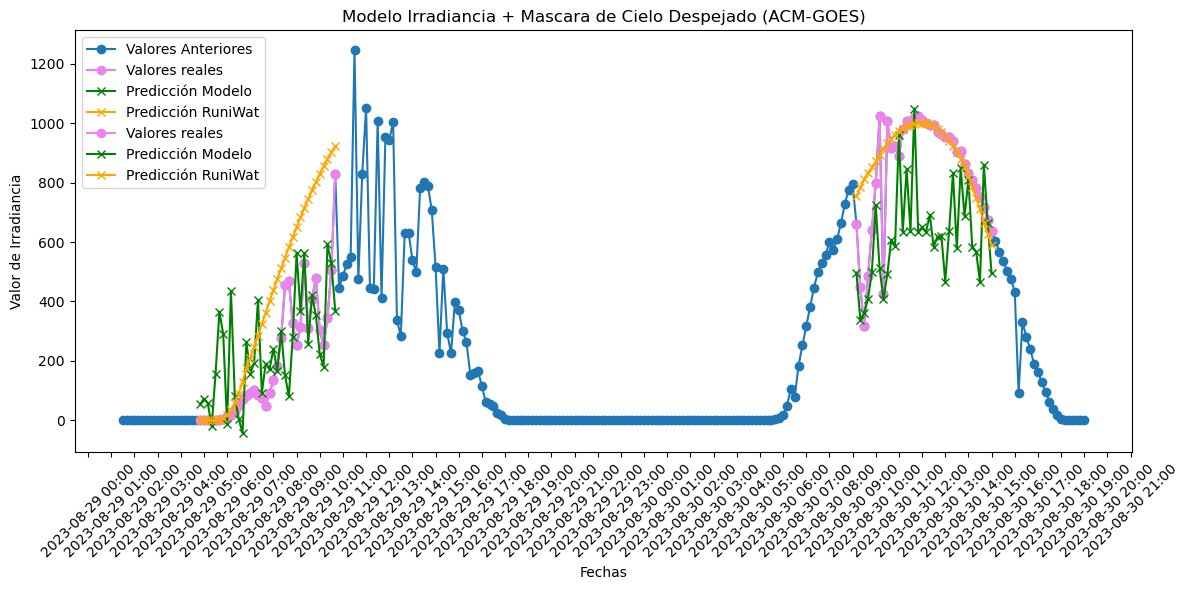

In [43]:
import matplotlib.dates as mdates

fechas_ =  [datetime.strptime(fecha_str[0], '%Y-%m-%d %H:%M')  for fecha_str in fechas_test]
fechas = [datetime.strptime(fecha_str, '%Y-%m-%d %H:%M') for fecha_str in fechas_predichas]
fechas2 = [datetime.strptime(fecha_str, '%Y-%m-%d %H:%M') for fecha_str in fechas_predichas_2]

plt.figure(figsize=(12, 6))

plt.plot(fechas_[500:750], y_test[500:750,0], label="Valores Anteriores", marker='o')
plt.plot(fechas, valores_reales, label='Valores reales', marker='o', color='violet')
plt.plot(fechas, valores_predichos[0], label='Predicción Modelo', marker='x', color='green')
plt.plot(fechas, df_rw_1['ghi'], label='Predicción RuniWat', marker='x', color='orange')

plt.plot(fechas2, valores_reales_2, label='Valores reales', marker='o', color='violet')
plt.plot(fechas2, valores_predichos_2[0], label='Predicción Modelo', marker='x', color='green')
plt.plot(fechas2, df_rw_2['ghi'], label='Predicción RuniWat', marker='x', color='orange')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Formatear las fechas
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Puedes ajustar el intervalo según tus datos

plt.xticks(rotation=45)
plt.legend()
plt.title('Modelo Irradiancia + Mascara de Cielo Despejado (ACM-GOES)')
plt.xlabel('Fechas')
plt.ylabel('Valor de Irradiancia')
plt.tight_layout()
plt.show()

### Almacenar Modelo Entrenado

In [ ]:
import joblib

# Guardar el modelo en un archivo
# joblib.dump(model, 'modelo_ACHA.pkl')